# Weterani

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Poniższy zbiór danych zawiera dane dotyczące kampanii mailingowej mającej zachęcić ludzi do wysłania datków na pewne stowarzyszenie o weteranach. Zmienne, które oznaczają nasz `y` to `TARGET_B` - informacja o tym, czy osoba wysłała datek oraz `TARGET_D` - informacja o tym jaka była wysokość datku. Podczas uczenia będziemy modelować zmienną `TARGET_B` - ale pamiętamy żeby usunąć również zmienną `TARGET_D` z danych ;)  

Głównym problemem w przypadku tego zbioru jest przygotowanie go do uczenia - zbiór zawiera dużą ilość kolumn, ponadto ma bardzo dużo braków danych i zmiennych kategorycznych o wielu poziomach.  

Dokładny opis: https://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98dic.txt

In [4]:
data = pd.read_csv("cup98lrn.txt", na_values=[" "], low_memory=True)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,NaN,NaN,3712,0,NaN,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,NaN,NaN,5202,0,NaN,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,NaN,NaN,0,0,NaN,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,NaN,NaN,2801,0,NaN,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,NaN,0,FL,33176,NaN,NaN,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [6]:
data.shape

(95412, 481)

In [7]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [8]:
y = data['TARGET_B']

In [36]:
np.unique(y)

array([0, 1], dtype=int64)

In [35]:
X_train = data.values

In [37]:
X_smaller_0 = X_train[y == 0, :]
X_smaller_1 = X_train[y == 1, :]

print(X_smaller_0.shape, X_smaller_1.shape)

indices_0_undersampled = np.random.choice(X_smaller_0.shape[0], size=X_smaller_1.shape[0], replace=False)

X_undersampled_0 = X_smaller_0[indices_0_undersampled]

X_undersampled = np.vstack([X_undersampled_0, X_smaller_1])

y_undersampled = np.array([0]*X_undersampled_0.shape[0] + [1]*X_smaller_1.shape[0]) 

print(X_undersampled.shape, y_undersampled.shape)

(90569, 481) (4843, 481)
(9686, 481) (9686,)


In [67]:
X_u_df = pd.DataFrame(X_undersampled, columns=data.columns )

# data.dtypes
for x in data.columns:
    X_u_df[x]=data[x].astype(data[x].dtypes.name)

X_u_df.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,NaN,NaN,3712,0,NaN,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,NaN,NaN,5202,0,NaN,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,NaN,NaN,0,0,NaN,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,NaN,NaN,2801,0,NaN,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,NaN,0,FL,33176,NaN,NaN,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


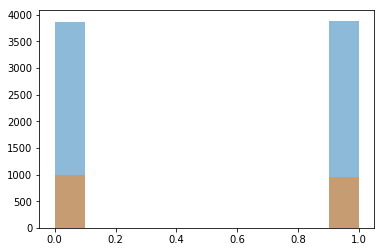

In [68]:
from sklearn.model_selection import train_test_split
train_data, X_test, y_train, y_test = train_test_split(X_u_df, y_undersampled, test_size=0.2, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zad. 

Potencjalny plan działania:

0. wyciągnięcie kolumn `TARGET_D`, `TARGET_B` z ramki
1. Indentyfikacja kolumn o dużej ilości braków danych, oraz decyzja, co z nimi zrobić. Część kolumn można pewnie usunąć, resztą w jakiś sposób imputować. Warto zwrócić uwagę na kolumny, które mają tylko jeden poziom oraz wartość `NaN` - być może `NaN` jest również jakąś informacją.
2. Kolumny kategoryczne - część z nich ma ogromną liczbę poziomów - tutaj też trzeba podjąć jakąś decyzję (albo usunąć całą kolumnę, albo w jakiś sposób sobie z tym radzić). 
3. W tym momencie najprawdopodobniej będziemy mieli mniej kolumn - można zacząć myśleć o budowaniu modelu, ewentualnie poprzedzonego jakąś selekcją cech.
4. Walidacja modelu - sprawdzić, gdzie postawić najbardziej optymalny próg odcięcia. Obliczyć otrzymany zysk.

In [69]:
for i in train_data.columns:
    print(i)
    print(train_data[i].value_counts().shape)
    
# train_data.heada

ODATEDW
(15,)
OSOURCE
(475,)
TCODE
(21,)
STATE
(49,)
ZIP
(5294,)
MAILCODE
(1,)
PVASTATE
(1,)
DOB
(748,)
NOEXCH
(5,)
RECINHSE
(1,)
RECP3
(1,)
RECPGVG
(1,)
RECSWEEP
(1,)
MDMAUD
(10,)
DOMAIN
(16,)
CLUSTER
(53,)
AGE
(82,)
AGEFLAG
(2,)
HOMEOWNR
(2,)
CHILD03
(3,)
CHILD07
(3,)
CHILD12
(3,)
CHILD18
(3,)
NUMCHLD
(5,)
INCOME
(7,)
GENDER
(5,)
WEALTH1
(10,)
HIT
(58,)
MBCRAFT
(6,)
MBGARDEN
(4,)
MBBOOKS
(10,)
MBCOLECT
(4,)
MAGFAML
(9,)
MAGFEM
(5,)
MAGMALE
(4,)
PUBGARDN
(6,)
PUBCULIN
(5,)
PUBHLTH
(10,)
PUBDOITY
(9,)
PUBNEWFN
(10,)
PUBPHOTO
(2,)
PUBOPP
(10,)
DATASRCE
(3,)
MALEMILI
(56,)
MALEVET
(79,)
VIETVETS
(88,)
WWIIVETS
(98,)
LOCALGOV
(37,)
STATEGOV
(46,)
FEDGOV
(46,)
SOLP3
(3,)
SOLIH
(5,)
MAJOR
(1,)
WEALTH2
(10,)
GEOCODE
(7,)
COLLECT1
(1,)
VETERANS
(1,)
BIBLE
(1,)
CATLG
(1,)
HOMEE
(1,)
PETS
(1,)
CDPLAY
(1,)
STEREO
(1,)
PCOWNERS
(1,)
PHOTO
(1,)
CRAFTS
(1,)
FISHER
(1,)
GARDENIN
(1,)
BOATS
(1,)
WALKER
(1,)
KIDSTUFF
(1,)
CARDS
(1,)
PLATES
(1,)
LIFESRC
(3,)
PEPSTRFL
(1,)
POP901
(3740,)
POP902
(1995,)


In [70]:
train_data.columns[train_data.dtypes==np.float64]

Index(['CLUSTER', 'AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT', 'MBGARDEN',
       'MBBOOKS', 'MBCOLECT', 'MAGFAML',
       ...
       'RAMNT_24', 'RAMNTALL', 'MINRAMNT', 'MAXRAMNT', 'LASTGIFT', 'NEXTDATE',
       'TIMELAG', 'AVGGIFT', 'TARGET_D', 'CLUSTER2'],
      dtype='object', length=103)

In [71]:
print(train_data.dtypes)

ODATEDW       int64
OSOURCE      object
TCODE         int64
STATE        object
ZIP          object
MAILCODE     object
PVASTATE     object
DOB           int64
NOEXCH       object
RECINHSE     object
RECP3        object
RECPGVG      object
RECSWEEP     object
MDMAUD       object
DOMAIN       object
CLUSTER     float64
AGE         float64
AGEFLAG      object
HOMEOWNR     object
CHILD03      object
CHILD07      object
CHILD12      object
CHILD18      object
NUMCHLD     float64
INCOME      float64
GENDER       object
WEALTH1     float64
HIT           int64
MBCRAFT     float64
MBGARDEN    float64
             ...   
RAMNT_20    float64
RAMNT_21    float64
RAMNT_22    float64
RAMNT_23    float64
RAMNT_24    float64
RAMNTALL    float64
NGIFTALL      int64
CARDGIFT      int64
MINRAMNT    float64
MINRDATE      int64
MAXRAMNT    float64
MAXRDATE      int64
LASTGIFT    float64
LASTDATE      int64
FISTDATE      int64
NEXTDATE    float64
TIMELAG     float64
AVGGIFT     float64
CONTROLN      int64


In [72]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

Zbudujmy **pipeline** dla atrybutów numerycznych:

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(train_data.columns[train_data.dtypes==np.float64])),
        ("imputer", Imputer(strategy="median")),
    ])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [74]:
num_pipeline.fit_transform(train_data)

array([[45.        , 84.        ,  1.        , ...,  4.66666667,
         0.        , 57.        ],
       [49.        , 35.        ,  4.        , ..., 20.        ,
         0.        , 43.        ],
       [30.        , 63.        ,  1.        , ..., 13.2       ,
         0.        , 50.        ],
       ...,
       [18.        , 62.        ,  1.        , ..., 12.25      ,
         0.        , 46.        ],
       [45.        , 62.        ,  1.        , ...,  9.        ,
         0.        , 59.        ],
       [12.        , 62.        ,  1.        , ..., 22.66666667,
         0.        , 20.        ]])

Będziemy także potrzebować imputera do kategorycznych kolumn  napisowych (zwykły Imputer nie działa na tych kolumnach):

In [75]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

Teraz możemy zbudować **pipeline** dla atrybutów kategorycznych:

In [76]:
from sklearn.base import TransformerMixin
from sklearn.utils import murmurhash3_32
class HashCategorical(TransformerMixin):
    
    def __init__(self, k=10):
        self.k = k
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #na każdej obserwacji w X zastosować funkcję murmurhash3_32
        X_transformed = X.applymap(lambda x: murmurhash3_32(str(x)) % self.k)
        return X_transformed 

In [77]:
from future_encoders import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(['OSOURCE', 'STATE', 'ZIP', 'MDMAUD', 'DOMAIN', 'GENDER',
       'RFA_2', 'RFA_3', 'RFA_4', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_11',
       'RFA_12', 'RFA_14', 'RFA_2R', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F',
       'MDMAUD_A', 'GEOCODE2'])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ])

In [78]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

Na koniec połączmy powyższe podejścia:

In [79]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [80]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

pipe = Pipeline([('preprocessing', preprocess_pipeline), ('classifier', LinearSVC(C=1))])

param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(train_data, y_train)
grid_1.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.Sim

KeyboardInterrupt: 

In [72]:
from sklearn import  metrics

models = []
models.append(('SVM linear', grid_1.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))

SVM linear
precision_score: 0.0
recall_score: 0.0
f1_score: 0.0


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy_score: 0.9487501965099827


In [74]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM linear'])
df

,Method,accuracy_score,f1_score,precision_score,recall_score
0,SVM linear,0.94875,0.0,0.0,0.0
